# Logistic Regression 邏輯回歸
# https://medium.com/@yanweiliu/python%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E7%AD%86%E8%A8%98-%E5%9B%9B-%E4%BD%BF%E7%94%A8scikit-learn%E9%80%B2%E8%A1%8C%E9%82%8F%E8%BC%AF%E8%BF%B4%E6%AD%B8%E5%88%86%E6%9E%90-a5769715015d

In [54]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics
%matplotlib inline

# 導入數據 
dataset = pd.read_csv(r'C:/Users/Cindy/Desktop/0728test.csv')
dataset

,Number,Input_A1_001,Input_A1_002,Input_A1_003,Input_A1_004,Input_A1_005,Input_A1_006,Input_A1_007,Input_A1_008,Input_A1_009,...,Input_C_134,Input_C_135,Input_C_136,Input_C_137,Output_A1,Output_A2,Output_A3,Output_A4,Output_A5,Output_A6
0,Test1,0.00,0.00,0.00,0.00,0.00,0.002,0.004,0.002,0.004,...,-0.004,4.00,1.0,1.0,3.202,4.280,2.804,4.805,3.178,2.888
1,Test2,0.00,0.00,0.00,0.00,0.00,0.016,0.004,0.002,0.004,...,0.003,4.00,1.0,1.0,4.303,4.113,2.949,3.073,3.539,4.187
2,Test3,0.00,0.00,0.00,0.00,0.00,0.006,0.006,0.002,0.002,...,-0.003,3.70,1.0,1.0,4.078,3.672,4.303,4.508,3.734,3.013
3,Test4,0.00,0.00,0.02,0.04,0.07,0.004,0.005,0.002,0.005,...,0.004,4.00,0.0,0.0,3.816,3.928,2.827,3.098,3.616,3.018
4,Test5,0.00,0.00,0.00,0.00,0.00,0.012,0.008,0.002,0.003,...,0.004,4.00,1.0,1.0,4.015,3.672,4.514,4.165,3.856,3.494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Test91,0.00,0.00,0.00,0.00,0.00,0.014,0.014,0.002,0.004,...,0.005,0.04,1.0,3.0,4.201,3.300,4.069,3.265,3.602,3.921
91,Test92,0.00,0.00,0.02,0.04,0.09,0.010,0.004,0.002,0.004,...,0.004,0.04,1.0,2.0,3.050,3.502,3.252,3.169,3.689,3.909
92,Test93,0.00,0.00,0.00,0.00,0.00,0.014,0.014,0.002,0.005,...,0.004,0.04,2.0,2.0,3.561,3.739,3.243,3.779,3.113,3.592
93,Test94,0.08,0.06,0.03,0.00,0.00,0.006,0.010,0.002,0.004,...,-0.005,0.04,2.0,2.0,2.863,3.962,3.145,3.212,3.156,3.647


In [55]:
X = dataset.iloc[:,1:24]
y = dataset['Output_A1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [56]:
#載入邏輯迴歸
from sklearn.linear_model import LogisticRegression
#建立訓練組邏輯迴歸模型
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train.astype('int'))
#使用模型來預測
predictions = logmodel.predict(X_test)

C:\Users\Cindy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# f1-score 
## 精度和召回率的加權平均值
## F1 = 2 * (precision * recall) / (precision + recall)
## 在1時達到最佳值，在0時達到最差值

In [57]:
#載入classification_report來看預測和實際數值的差異，包含precision、recall、f1-score及support
from sklearn.metrics import classification_report
print(classification_report(y_test.astype('int'),predictions.astype('int')))

              precision    recall  f1-score   support

           3       0.69      1.00      0.82        20
           4       0.00      0.00      0.00         9

    accuracy                           0.69        29
   macro avg       0.34      0.50      0.41        29
weighted avg       0.48      0.69      0.56        29



C:\Users\Cindy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [58]:
#模型分數
from sklearn import metrics
logmodel.score(X_train,y_train.astype('int'))

0.7575757575757576

In [62]:
#print("Accuracy:",metrics.accuracy_score(y_test, y_train).astype('int'))
#print("Precision:",metrics.precision_score(y_test, y_train).astype('int'))
#print("Recall:",metrics.recall_score(y_test, y_train).astype('int'))

In [59]:
#建立confusion_matrix混淆矩陣
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test.astype('int'),predictions)
matrix

array([[20,  0],
       [ 9,  0]], dtype=int64)

# 混淆矩陣說明
## TN=True Negative
## FP=False Positive
## FN=False Negative
## TP=True Positive
## precison = TP / (TP + FP)
## recall = TP / (TP + FN)
## accuracy = (TP + TN) / (TN + FP + FN + TP)
### F-beta score可視為precision和recall加權平均的值，數值介於0-1，最好是1。
### support代表在測試組y實際值的發生次數。



Text(0.5, 15.0, 'Predicted label')

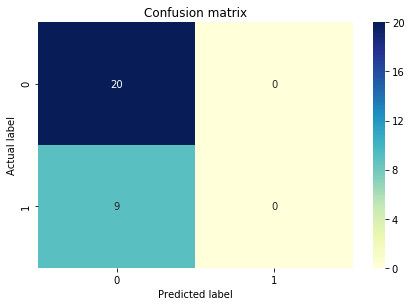

In [60]:
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')